In [ ]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.decomposition import PCA
import joblib
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [ ]:
def plot_graph(df, legend_1, legend_2):
	if legend_2 == 3:
		df[legend_2]=df[legend_2].abs()
	if legend_1 == 3:
		df[legend_1]=df[legend_1].abs()
	postives = df.loc[df["class"] == 1]
	negatives = df.loc[df["class"] == 0]
	figure = plt.figure()
	plt.xlabel(legend_1[1])
	plt.ylabel(legend_2[1])
	plt.plot(postives.iloc[:, legend_1[0]], postives.iloc[:, legend_2[0]], 'ro', label="Tsunamigenic")
	plt.plot(negatives.iloc[:, legend_1[0]], negatives.iloc[:, legend_2[0]], 'bo', label="Non-Tsunamigenic")
	plt.legend(loc="best")
	figure.savefig(legend_1[2] + "_vs_" + legend_2[2] + ".svg", format='svg', dpi=1200)
	plt.show()	

In [ ]:
def features_relationship(df, array):
	colors = np.where(df.iloc[:, -1] > 0, 'b', 'r')
	legends = ['magnitude', 'depth', 'region', 'distance']
	f, ax_arr = plt.subplots(4,3)
	f.canvas.set_window_title('Feature Relationship')
	f.subplots_adjust(hspace=0.36, top=1.0, bottom=0.06, wspace=0.22, left=0.05, right=0.95)
	x, y = 0, 0
	for i in range(len(legends)):
		y = 0
		for j in range(len(legends)):
			if legends[i] != legends[j]:
				ax_arr[x, y].set(xlabel=legends[i], ylabel=legends[j])
				ax_arr[x, y].scatter(df.iloc[:, i], df.iloc[:, j], c=colors)
				y += 1
		x += 1
	figManager = plt.get_current_fig_manager()
	#figManager.window.showMaximized()
	plt.show()

In [ ]:
def dimensional_reduction(features, labels):
	pca = PCA(n_components=2)
	pca.fit(features)
	first_component = pca.components_[0]
	second_component = pca.components_[1]
	reduced_data = pca.transform(features)
	f = plt.figure(figsize=(8, 8))
	f.canvas.set_window_title('PCA of Tsunami Dataset')
	pos = plt.scatter(reduced_data[labels == 1, 0], reduced_data[labels == 1, 1], color='b', lw=2)
	neg = plt.scatter(reduced_data[labels == 0, 0], reduced_data[labels == 0, 1], color='r', lw=2)
	plt.legend((pos, neg), ('Tsunami-genic', 'Non Tsunami-genic'))
	plt.show()

In [ ]:
def target_feature_split(dataset):
	return dataset[:, 0:4], dataset[:, -1]


def split_dataset(X, y):
	return train_test_split(X, y, test_size=0.25, random_state=50)


def train_model(features, labels):
	clf = RandomForestClassifier(n_estimators=5, random_state=1)
	clf.fit(features, labels)
	_ = joblib.dump(clf, file_name)


def test_model(features):
	try:
		clf = joblib.load(file_name)
		return clf.predict(features)
	except:
		print('Please train the model...')

In [ ]:
def get_cv_score(X, y):
	try:
		clf = joblib.load(file_name)
		cv = ShuffleSplit(n_splits=5, test_size=0.30, random_state=50)
		return cross_val_score(clf, X, y, cv=cv)
	except:
		print('Please train the model...')

def find_score(pred_values, actual_values):
	return accuracy_score(pred_values, actual_values)

In [ ]:
def predict_tsunami(features):
	try:
		clf = joblib.load(file_name)
		pred = clf.predict(features)
		return True if pred[0] else False
	except Exception as e:
		print('Please train the model...')

In [ ]:
file_name = "/model.pkl"

In [ ]:
if __name__ == '__main__':
	labels =  ['magnitude', 'focal_depth', 'region', 'distance', 'class']
	df = pd.read_csv("dataset_final_v7.csv", names=labels)
	dataset = df.values

	#View relationship between featuers
	# features_relationship(df, dataset)
	#View individual plot
	df['distance'] = df['distance'].abs()
	# plot_graph(df, [0, "Magnitude (Richter Scale)", "magnitude"], [1, "Focal depth (Km)", "depth"])
	# plot_graph(df, [0, "Magnitude (Richter Scale)", "magnitude"], [3, "Distance from nearest coastal point (Km)", "distance"])
	# plot_graph(df, [0, "Magnitude (Richter Scale)", "magnitude"], [2, "Region of epicenter (Land - 1 / Sea - 0)", "region"])
	# plot_graph(df, [1, "Focal depth (Km)", "depth"], [2, "Region of epicenter (Land - 1 / Sea - 0)", "region"])
	# plot_graph(df, [1, "Focal depth (Km)", "depth"], [3, "Distance from nearest coastal point (Km)", "distance"])

	# Split dataset
	X, y = target_feature_split(dataset)
	features_train, features_test, labels_train, labels_test = split_dataset(X, y)

	# Dimensional Reduction
	#dimensional_reduction(X, y)

	# Training the model
	train_model(features_train, labels_train)

	# Testing the model
	pred = test_model(features_test)

	# Evaluating the model
	score = find_score(pred, labels_test)

	# Confusion matrix
	print(confusion_matrix(labels_test, pred, labels=[1,0]))

	# Classification report
	print(classification_report(labels_test, pred, target_names=['class 0', 'class 1']))

	# Score
	print('Score : {}'.format(round(score * 100, 2)))

	# CV Score
	cv_score = get_cv_score(X, y)
	print('Score : {} (+/- {})'.format(round(cv_score.mean(), 2), round(cv_score.std(), 2)))

[[161   4]
 [  1  83]]
              precision    recall  f1-score   support

     class 0       0.95      0.99      0.97        84
     class 1       0.99      0.98      0.98       165

    accuracy                           0.98       249
   macro avg       0.97      0.98      0.98       249
weighted avg       0.98      0.98      0.98       249

Score : 97.99
Score : 0.98 (+/- 0.01)


In [ ]:
df.head()

,magnitude,focal_depth,region,distance,class
0,4.0,108,0,0.0000,0
1,4.0,113,0,0.0000,0
2,4.1,1,1,-251.1790,0
3,4.1,1,0,0.0000,0
4,4.1,178,1,-46.7786,0


In [ ]:
X.shape

(995, 4)

In [ ]:
X

array([[   4.     ,  108.     ,    0.     ,    0.     ],
       [   4.     ,  113.     ,    0.     ,    0.     ],
       [   4.1    ,    1.     ,    1.     , -251.179  ],
       ...,
       [   9.1    ,   30.     ,    0.     ,    0.     ],
       [   9.1    ,   30.     ,    0.     ,    0.     ],
       [   9.5    ,   33.     ,    1.     ,   -3.15413]])

In [ ]:
df['distance']

0        0.00000
1        0.00000
2     -251.17900
3        0.00000
4      -46.77860
         ...    
990      0.00000
991      0.00000
992      0.00000
993      0.00000
994     -3.15413
Name: distance, Length: 995, dtype: float64

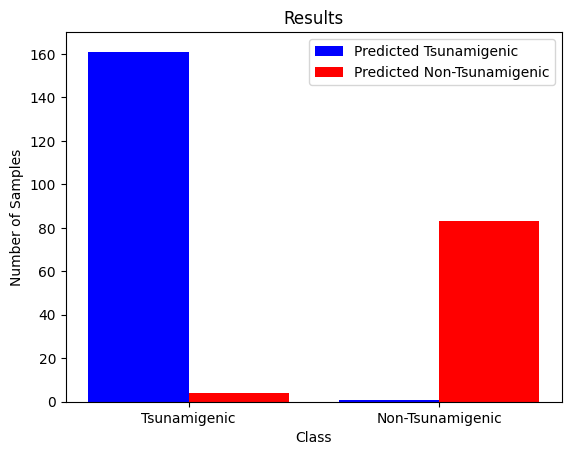

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data as a 2D array
data = np.array([[161, 4], [1, 83]])

# Define the labels for the x and y axes
labels = ['Tsunamigenic', 'Non-Tsunamigenic']
x_labels = ['Predicted Tsunamigenic', 'Predicted Non-Tsunamigenic']

# Set the width of the bars
width = 0.4

# Define the x-coordinates of the bars
x = np.arange(len(labels))

# Create the vertical bar plot
fig, ax = plt.subplots()
ax.bar(x - width/2, data[:, 0], width, color='b', label=x_labels[0])
ax.bar(x + width/2, data[:, 1], width, color='r', label=x_labels[1])
ax.legend()

# Set y-axis limits to show both bars
ax.set_ylim(0, 170)

# Add annotations for the values
for i in range(len(labels)):
    for j in range(len(x_labels)):
        ax.annotate(str(data[i, j]), xy=(x[i] + (-1 if j == 0 else 1) * width/4, data[i, j]),
                    ha='center', va='bottom', color='white')

# Add labels and title
ax.set_ylabel('Number of Samples')
ax.set_xlabel('Class')
ax.set_title('Results')
plt.xticks(x, labels)
plt.show()
